In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D



In [2]:
df = pd.read_csv("main_.csv")
df

,Unnamed: 0,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...,...
22745,22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [3]:
df.head()

,Unnamed: 0,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            22750 non-null  int64  
 1   Employee ID           22750 non-null  object 
 2   Date of Joining       22750 non-null  object 
 3   Gender                22750 non-null  object 
 4   Company Type          22750 non-null  object 
 5   WFH Setup Available   22750 non-null  object 
 6   Designation           22750 non-null  float64
 7   Resource Allocation   21369 non-null  float64
 8   Mental Fatigue Score  20633 non-null  float64
 9   Burn Rate             21626 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


# Filling Missing datas in Resource Allocation 

In [6]:
df["Resource Allocation"].isna().sum()

1381

In [23]:
df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])

In [24]:
df["Month"] = df["Date of Joining"].dt.to_period("M")
monthly_counts = df['Month'].value_counts().sort_index()

In [25]:
company_Service = df[df["Company Type"] == "Service"]

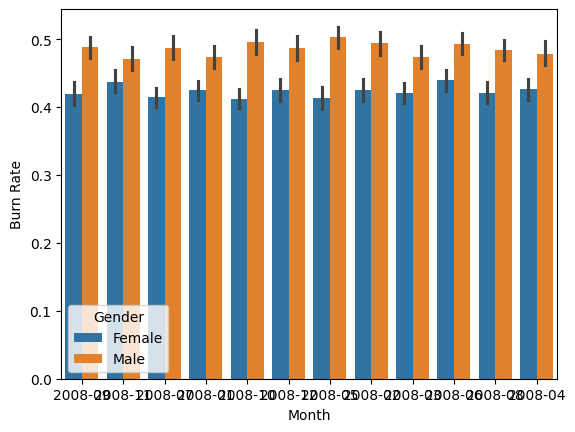

In [26]:
sns.barplot(x="Month",y="Burn Rate",data=company_Service,hue="Gender")
plt.show()

In [27]:
remote_work = df[df["WFH Setup Available"] == "Yes"]

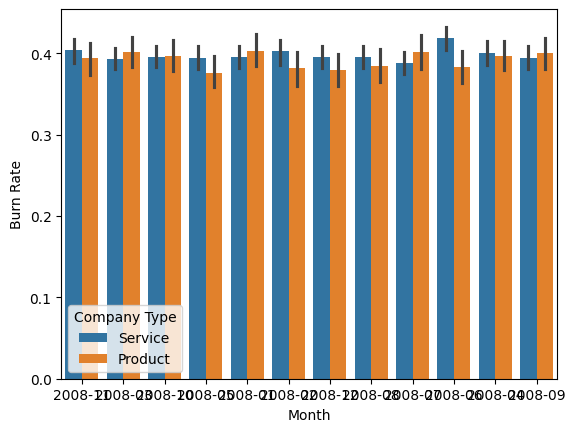

In [28]:
sns.barplot(x="Month",y="Burn Rate",data=remote_work,hue="Company Type")
plt.show()


































In [29]:
df.groupby("Month")["Burn Rate"].mean()

Month
2008-01    0.451380
2008-02    0.455129
2008-03    0.446573
2008-04    0.451965
2008-05    0.452465
2008-06    0.461315
2008-07    0.449051
2008-08    0.449229
2008-09    0.454853
2008-10    0.449529
2008-11    0.454027
2008-12    0.449331
Freq: M, Name: Burn Rate, dtype: float64

/home/nigora/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/nigora/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1889: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)


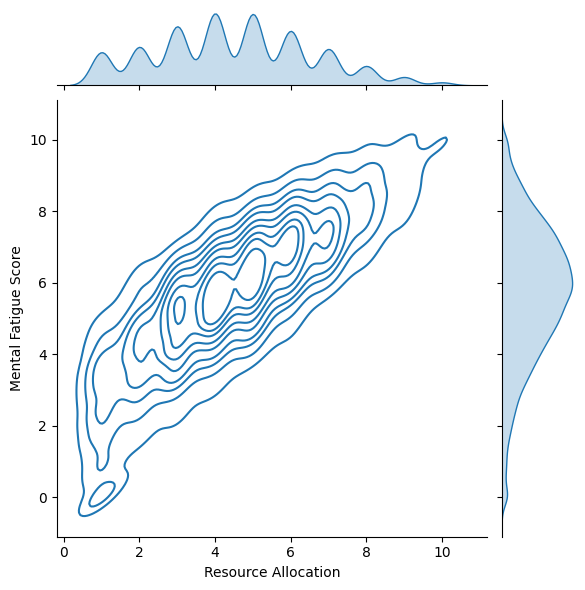

In [30]:
g = sns.JointGrid(data=df,x = "Resource Allocation", y = "Mental Fatigue Score")
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot,shade= True)

<Axes: xlabel='Resource Allocation', ylabel='Mental Fatigue Score'>

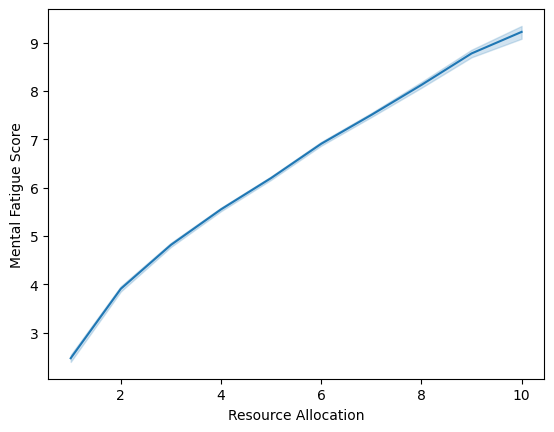

In [31]:
sns.lineplot(x="Resource Allocation",y="Mental Fatigue Score",data=df)

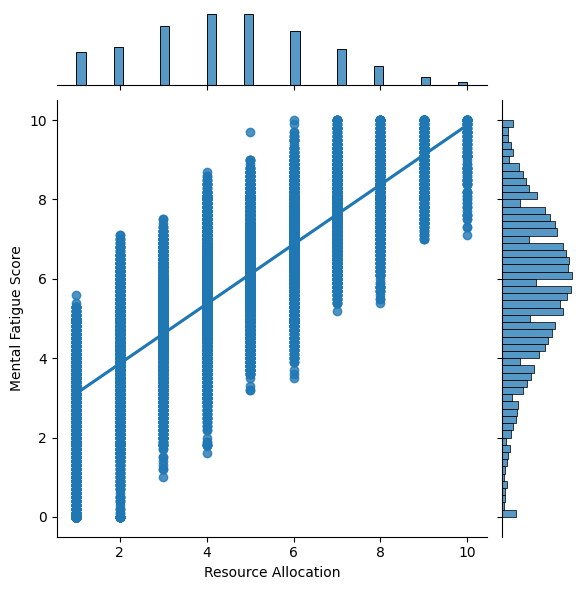

In [32]:
g = sns.JointGrid(data=df,x = "Resource Allocation", y = "Mental Fatigue Score")
g.plot(sns.regplot,sns.histplot)

In [33]:


sns.barplot(x="Month",y="Mental Fatigue Score",data= df,hue="Gender")
plt.

SyntaxError: invalid syntax (3860658178.py, line 2)

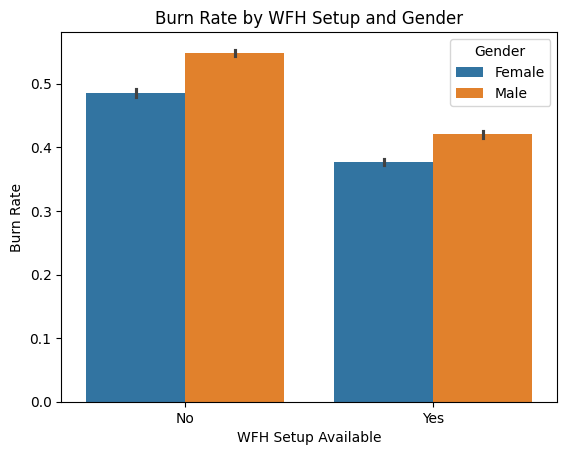

In [ ]:
fig2, ax2 = plt.subplots()
sns.barplot(x="WFH Setup Available", y="Burn Rate", data=df, hue="Gender", ax=ax2)
ax2.set_xlabel('WFH Setup Available')
ax2.set_ylabel('Burn Rate')
ax2.set_title('Burn Rate by WFH Setup and Gender')
plt.show()

<Axes: xlabel='WFH Setup Available', ylabel='Burn Rate'>

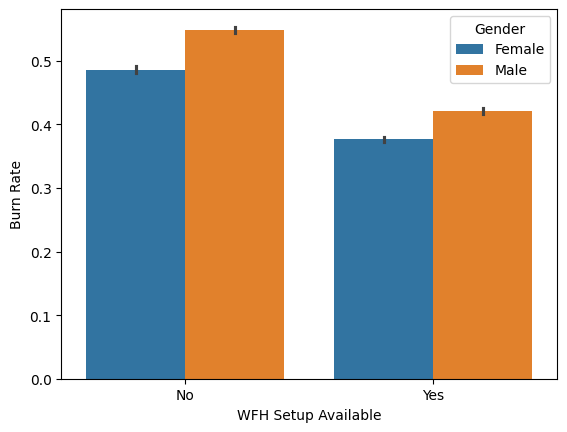

In [ ]:
sns.barplot(x="WFH Setup Available",y="Burn Rate",data=df,hue="Gender")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               22750 non-null  int64  
 1   Xodim ID si              22750 non-null  object 
 2   Qo'shilish sanasi        22750 non-null  object 
 3   Companiya turi           22750 non-null  object 
 4   Designation              22750 non-null  float64
 5   Resurslarni taqsimlash   21369 non-null  float64
 6   Ruhiy charchoq reytingi  20633 non-null  float64
 7   Burn Rate                21626 non-null  float64
 8   Jinsi_Female             22750 non-null  int64  
 9   Jinsi_Male               22750 non-null  int64  
 10  Uydan ishlash_No         22750 non-null  int64  
 11  Uydan ishlash_Yes        22750 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 2.1+ MB


In [ ]:
df.info()

NameError: name 'df' is not defined

<Axes: >

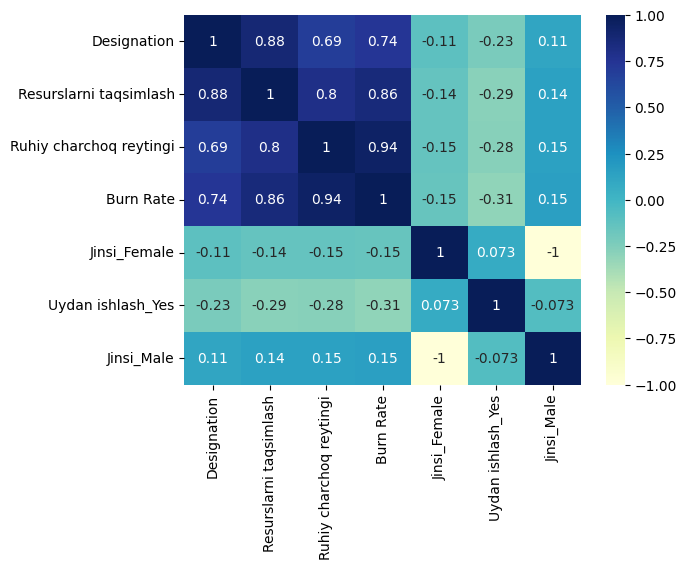

In [ ]:
#cols = ['Designation', 'Resurslarni taqsimlash', 'Ruhiy charchoq reytingi', 'Burn Rate','Jinsi_Female','Uydan ishlash_Yes',"Jinsi_Male"]
#sns.heatmap(df[cols].corr(),cmap='YlGnBu', annot=True)

In [ ]:
df = df.drop(columns="Jinsi_Male")
df = df.reset_index(drop=True)

In [ ]:
df = df.drop(columns="Uydan ishlash_No")
df = df.reset_index(drop=True)

In [ ]:
df

,Unnamed: 0,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,fffe32003000360033003200,2008-09-30,Female,Service,NaN,2.0,3.0,3.8,0.16
1,1,fffe3700360033003500,2008-11-30,Male,Service,NaN,1.0,2.0,5.0,0.36
2,2,fffe31003300320037003900,2008-03-10,Female,Product,NaN,2.0,NaN,5.8,0.49
3,3,fffe32003400380032003900,2008-11-03,Male,Service,NaN,1.0,1.0,2.6,0.20
4,4,fffe31003900340031003600,2008-07-24,Female,Service,NaN,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...,...
22745,22745,fffe31003500370039003100,2008-12-30,Female,Service,NaN,1.0,3.0,NaN,0.41
22746,22746,fffe33003000350031003800,2008-01-19,Female,Product,NaN,3.0,6.0,6.7,0.59
22747,22747,fffe390032003000,2008-11-05,Male,Service,NaN,3.0,7.0,NaN,0.72
22748,22748,fffe33003300320036003900,2008-01-10,Female,Service,NaN,2.0,5.0,5.9,0.52
